### Setup packages 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%pip install progressbar
%pip install plotnine
%pip install torch
%pip install ipython-autotime
%load_ext autotime

  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=d6f0238feb5e8481dfb4b9e6365cc18f01cd5ac2e690c8465d42e39f58fb363a
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built progressbar
time: 134 µs (started: 2022-05-21 16:09:55 +00:00)


In [4]:
from plotnine import *
from plotnine.themes import *

time: 1.68 s (started: 2022-05-21 16:09:55 +00:00)


In [5]:
import tensorflow as tf
from scipy.io import loadmat
import random
import math
import tensorflow_probability as tfp

time: 2.76 s (started: 2022-05-21 16:09:57 +00:00)


_paper_name_ establishes the reusable name of the paper, it represents the directory under data_papers on the google drive

In [6]:
paper_name = "dgm_hjb"

time: 829 µs (started: 2022-05-21 16:10:00 +00:00)


In [7]:
import os, sys
import errno

# make a directory if it does not exist
def make_dir_if_not_exist(used_path):
    if not os.path.isdir(used_path):
        try:
            os.mkdir(used_path)
        except OSError as exc:
            if exc.errno != errno.EEXIST:
                raise exc
            else:
                raise ValueError(f'{used_path} directoy cannot be created because its parent directory does not exist.')

# make directories if they do not exist

make_dir_if_not_exist("/content/drive/MyDrive/data_papers/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_features/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_history/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_predictions/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_ccs/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/temp/")

time: 590 ms (started: 2022-05-21 16:10:00 +00:00)


In [8]:
# Set up the imports
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

import site
import os
import tensorflow as tf
import pandas as pd
import h5py as h5
import matplotlib.pyplot as plt
import errno
import numpy as np
import itertools
import multiprocessing
import json
import datetime
import random
from collections import defaultdict
from sklearn.model_selection import train_test_split

pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 40)


time: 9.29 ms (started: 2022-05-21 16:10:00 +00:00)


In [9]:
import torch 
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from matplotlib import cm
import pdb


time: 2.89 s (started: 2022-05-21 16:10:00 +00:00)


In [10]:
import plotly.graph_objects as go
import plotly.express as px
from pprint import pprint as pp

time: 2.04 s (started: 2022-05-21 16:10:03 +00:00)


### Shared functions across models

In [18]:
import pandas as pd

def plot_report(train_instance):
        
    history_tl_cpu = [ x for x in train_instance.history_tl ]
    history_internal_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_internal_cpu ]
    history_terminal_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_terminal ]
    history_initial_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_initial ]
    history_nonzero_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_nonzero ]

    obs_data = pd.DataFrame({"Epochs" : [ (x+1)*train_instance.hook_interval for x in range(len(history_initial_cpu))], 
                             "AvgLogLoss": np.log(history_tl_cpu), 
                             "TerminalLogLoss" :  np.log(history_terminal_cpu),
                             "InternalLogLoss" :  np.log(history_internal_cpu),
                             "InitialLogLoss" : np.log(history_initial_cpu),
                             "NonZeroLogLoss" : np.log(history_nonzero_cpu),
                             })

    return (ggplot(obs_data, aes("Epochs","AvgLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","TerminalLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","InternalLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","InitialLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","NonZeroLogLoss")) + geom_line() + geom_point(),
            )

def plot_activation_mean(train_instance):
    
    # pdb.set_trace()

    if train_instance.debug == False:
        print( 'error: debug is off , turn it on and train again ' )
    else:
        history = np.array(train_instance.history_mean_hooks)
        jet= plt.get_cmap('jet')
        colors = iter(jet(np.linspace(0,1,10)))
        fig, ax = plt.subplots()
        for i in range(history.shape[1]):
            ax.plot(history[:,i], '--r', label= i , color=next(colors) )
        fig.suptitle('Layers activation mean value', fontsize=10)
        leg = ax.legend();


time: 24.8 ms (started: 2022-05-21 16:15:31 +00:00)


In [19]:
# plot_report(train)
# plot_activation_mean(train)

time: 630 µs (started: 2022-05-21 16:15:31 +00:00)


In [20]:
# print( 'Value at 0' , net( torch.tensor( [ 0. , 1. , 1. , 1. ] ).cuda() ) )
# #%% save
# torch.save(net.state_dict(), './model3Assets')
# #%%
# net = TheModelClass(*args, **kwargs)
# net.load_state_dict(torch.load('./modelmodel3Assets'))
# net.eval()

time: 1.15 ms (started: 2022-05-21 16:15:31 +00:00)


In [21]:
# a set up that just maximizes the loss s.t. loss < eps (maximizeloss_weights_st) using the weights on the losses
from scipy.optimize import LinearConstraint, NonlinearConstraint
from scipy.optimize import Bounds
from functools import partial
from scipy.optimize import minimize
from functools import wraps

def negative(f):
    @wraps(f)
    def g(*args,**kwargs):
        return - f(*args,**kwargs)
    # g.__name__ = f'negative({f.__name__})'
    return g
# kl_loss = nn.KLDivLoss(size_average=None, reduction="batchmean")

# we can add more minimization functions here later (e.g. SS diff)
def KLDiffHere( varX, loss_terms, log_target = False, reduction = "mean"):  
  target = torch.tensor([1./len(loss_terms)]*len(loss_terms))*torch.tensor(loss_terms)
  input = torch.tensor(varX*loss_terms)
  loss_pointwise = target * (torch.log(target) - torch.log(input))
  if reduction == "mean":  # default
      loss = loss_pointwise.mean()
  elif reduction == "batchmean":  # mathematically correct
      loss = loss_pointwise.sum() / input.size(0)
  elif reduction == "sum":
      loss = loss_pointwise.sum()
  else:  # reduction == "none"
      loss = loss_pointwise  
  return loss

  # return torch.nn.KLDivLoss(varX*loss_terms,np.array([1./len(loss_terms)]*len(loss_terms))*loss_terms)

def minimize_weights_st(loss_terms, loss_func):
  bounds = Bounds([0]*len(loss_terms), [1.0]*len(loss_terms))
  linear_constraint = LinearConstraint([[1]*len(loss_terms)], [1.0], [1.0])
  x0 = [0.25]*len(loss_terms)
  res = minimize( partial(loss_func, loss_terms=loss_terms), 
                  x0, 
                  method='trust-constr', 
                  constraints=[linear_constraint],
                  options={'verbose': 0}, 
                  bounds=bounds )
  return res

def maximizeloss_weights_st(loss_terms, loss_func, eps):
  bounds = Bounds([0]*len(loss_terms), [1.0]*len(loss_terms))
  linear_constraint = LinearConstraint([[1]*len(loss_terms)], [1.0], [1.0])
  nonlinear_constraint  = NonlinearConstraint(negative(partial(loss_func, loss_terms=loss_terms)),1E-9,eps)
  # even though zero is the KL minimum it helps to put a negative number here to explore

  x0 = [1.0/len(loss_terms)]*len(loss_terms)
  res = minimize( negative(partial(loss_func, loss_terms=loss_terms)), 
                  x0, 
                  method='trust-constr', 
                  constraints=[linear_constraint, nonlinear_constraint],
                  options={'verbose': 0}, 
                  bounds=bounds )
  return res


time: 31.7 ms (started: 2022-05-21 16:15:31 +00:00)


In [22]:
r1 = maximizeloss_weights_st( [ 34.25, 100.12, 23.45] , KLDiffHere, 1E9)
print(r1.x)

[0.33334757 0.33333761 0.33331482]
time: 74.8 ms (started: 2022-05-21 16:15:31 +00:00)


In [23]:
### There is an issue getting this to work because of nonlinear_constraint  = NonlinearConstraint(negative(partial(loss_func, loss_terms=loss_terms)),1E-9,eps)

    # def calculateLossAdaptWeights(self , size = 2**8 , train = True, min_max = True):
    #     '''
    #     Helper function that Sample and Calculate loss,
    #     This is adapted in that it changes the weights on the losses to maximize the loss provided
    #     the KL distance of the new weighting is within self.eps of the previous distribution (starting at equally weighted)
    #     '''        
    #     x , x_terminal , x_boundary = self.sample(size)
    #     x = Variable( x , requires_grad=True)
    #     Ls = self.criterion( x , x_terminal , x_boundary )
    #     DO , TC , BC = Ls
    #     DOm = torch.mean(DO).detach().cpu().float().item()
    #     TCm = torch.mean(TC).detach().cpu().float().item()
    #     BCm = torch.mean(BC).detach().cpu().float().item()

    #     losses_for_reweighting = [ torch.mean(lv).detach().cpu().float().item() for lv in Ls if list(lv.size())] 
    #     mask_for_available_losses = [ True if list(lv.size()) else False for lv in Ls ]

    #     # print([ DOm, TCm, BCm])
    #     # if is.nan(DOm):
    #     #   print(DO)

    #     if self.weights is None:
    #       self.weights = torch.ones(1,len(Ls))/len(Ls)

    #     # pdb.set_trace()

    #     if min_max:
    #         r1 = maximizeloss_weights_st( losses_for_reweighting , KLDiffHere, self.eps)
    #         candidate_weigths = torch.zeros_like(self.weights).to(torch.device("cuda:0"))
    #         candidate_weigths[0][mask_for_available_losses] = torch.tensor(r1.x).to(torch.device("cuda:0")).float()
    #         self.weights = candidate_weigths.to(torch.device("cuda:0"))
    #         self.weights_tbl.append(self.weights.detach().cpu().numpy())

    #     numActive = np.sum([1 if list(lv.size()) else 0 for lv in Ls ])
    #     if train == True:
    #         return  (self.weights[0,0]*torch.mean(DO) + 
    #                  self.weights[0,1]*torch.mean(TC) + 
    #                  self.weights[0,2]*torch.mean(BC)) , \
    #                  self.weights[0,0]*torch.mean(DO) , \
    #                  self.weights[0,1]*torch.mean(TC) , \
    #                  self.weights[0,2]*torch.mean(BC) , \
    #                  (1./numActive*torch.mean(DO) + 
    #                  1./numActive*torch.mean(TC) + 
    #                  1./numActive*torch.mean(BC))             
    #     else:
    #         return  DO , TC , BC


time: 4.57 ms (started: 2022-05-21 16:15:31 +00:00)


In [24]:
import torch
from torch.distributions import Normal

std_norm_cdf = Normal(0, 1).cdf
std_norm_pdf = lambda x: torch.exp(Normal(0, 1).log_prob(x))

def bs_price(right, K, S, T, sigma, r):
    d_1 = (1 / (sigma * torch.sqrt(T))) * (torch.log(S / K) + (r + (torch.square(sigma) / 2)) * T)
    d_2 = d_1 - sigma * torch.sqrt(T)
    
    if right == "C":
        C = std_norm_cdf(d_1) * S - std_norm_cdf(d_2) * K * torch.exp(-r * T)
        return C
        
    elif right == "P":
        P = std_norm_cdf(-d_2) * K * torch.exp(-r * T) - std_norm_cdf(-d_1) * S
        return P

time: 7.74 ms (started: 2022-05-21 16:15:31 +00:00)


In [25]:
import torch

def to_cpu_detach(x):
  if isinstance(x, list):
    return [ y.detach().cpu().item() for y in x ]
  else:
    return x.detach().cpu().item()

time: 1.94 ms (started: 2022-05-21 16:15:31 +00:00)


In [26]:
def huber_loss_zero_target(x, delta = 1.0):
  loss_function = torch.nn.HuberLoss(delta=delta)
  return loss_function(x, torch.zeros_like(x))


time: 1.23 ms (started: 2022-05-21 16:15:31 +00:00)


In [27]:
def save_model_train(lr, eqObject, eqLossFn, sample_method, trainObj, eqType):

        # self.u_net = u_net
        # self.pi_net = pi_net
        # self.wgamma = 0.0001
        # self.term_utility_func = term_utility_function
        # self.xbreaks = None
        # self.tbreaks = None

        # self.MAX_X = 1.0
        # self.T = 1.0
        # self.MAX_MU = 0.2
        # self.MAX_SIGMA = 1.0

        # self.pi_net_epoch = pi_net_epoch
        # self.pi_net_lr = pi_net_lr
        # self.loss_multiply = 1.0

  model_id_str =  f"{eqType}_{datetime.datetime.now():%Y%m%d%H%M%S}_{eqLossFn}_{sample_method}_{trainObj.stop_epoch}_{str(lr).replace('.','p')}_PiLr{str(eqObject.pi_net_lr).replace('.','p')}_PiEp{str(eqObject.pi_net_epoch)}"
  
  if eqObject is not None:
    try:
        beta = getattr(eqObject,"beta")
        beta_str = str(beta).replace('.','p')
        model_id_str = model_id_str + f"_beta{beta_str}"
    except AttributeError:
        pass
    try:
        wgamma = getattr(eqObject,"wgamma")
        wgamma_str = str(wgamma).replace('.','p')
        model_id_str = model_id_str + f"_wgamma{wgamma_str}"
    except AttributeError:
        pass
  
  torch.save(net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{model_id_str}")
  df_at_hookintervals = None
  train_losses = None
  validation_losses = None
  try:
      df_at_hookintervals = getattr(trainObj, "history_surfaces_hooks")
      if df_at_hookintervals is not None:
        df_at_hookintervals.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationHook_{trainObj.hook_interval}_{model_id_str}.csv", index=False)
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "history_surfaces_hooks"))

  try:
      train_losses = getattr(trainObj,"train_losses")
      if train_losses is not None:
        train_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))
      # raise NotImplementedError("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))

  try:
      validation_losses = getattr(trainObj,"validation_losses")
      if validation_losses is not None:
        validation_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "validation_losses"))

time: 22.7 ms (started: 2022-05-21 16:15:31 +00:00)


In [28]:
def save_model_train_stratified(lr, net,  eqLossFn, sample_method, trainObj, eqType, eqObject = None ):

  model_id_str =  f"{eqType}_{datetime.datetime.now():%Y%m%d%H%M%S}_{eqLossFn}_{sample_method}_{trainObj.stop_epoch}_{str(lr).replace('.','p')}_{net.NL}_{net.NN}"
  
  if eqObject is not None:
    try:
        beta = getattr(eqObject,"beta")
        beta_str = str(beta).replace('.','p')
        model_id_str = model_id_str + f"_beta{beta_str}"
    except AttributeError:
        pass
    try:
        wgamma = getattr(eqObject,"wgamma")
        wgamma_str = str(wgamma).replace('.','p')
        model_id_str = model_id_str + f"_gamma{wgamma_str}"
    except AttributeError:
        pass
    try:
        xbreaks = getattr(eqObject,"xbreaks")
        xbreaks_str = str(len(xbreaks))
        model_id_str = model_id_str + f"_StSaXbrks{xbreaks_str}"
    except AttributeError:
        pass
    try:
        tbreaks = getattr(eqObject,"tbreaks")
        tbreaks_str = str(len(tbreaks))
        model_id_str = model_id_str + f"_StSaTbrks{tbreaks_str}"
    except AttributeError:
        pass
  
  torch.save(net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{model_id_str}")
  df_at_hookintervals = None
  train_losses = None
  validation_losses = None
  try:
      df_at_hookintervals = getattr(trainObj, "history_surfaces_hooks")
      if df_at_hookintervals is not None:
        df_at_hookintervals.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationHook_{trainObj.hook_interval}_{model_id_str}.csv", index=False)
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "history_surfaces_hooks"))

  try:
      train_losses = getattr(trainObj,"train_losses")
      if train_losses is not None:
        train_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))
      # raise NotImplementedError("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))

  try:
      validation_losses = getattr(trainObj,"validation_losses")
      if validation_losses is not None:
        validation_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "validation_losses"))

time: 26.7 ms (started: 2022-05-21 16:15:31 +00:00)


### Merton Invest-Consumption Problem - Equation HJB optimization

[Extensions of the Deep Galerkin Method](https://arxiv.org/pdf/1912.01455v3.pdf)

##### Closed form terminal utility functions

In [29]:
def expTerminalUtilityOfWealth(x, gamma_discount = 1.0):
  return(-torch.exp(-gamma_discount*x))

def expTerminalUtilityOfWealth_np(x, gamma_discount = 1.0):
  return(-np.exp(-gamma_discount*x))

from functools import partial

# should give a closed form solution for the control => PI(x,t) = [(mu-r)/(gamma*sigma^2)]*exp(-r*(T-t))

time: 3.04 ms (started: 2022-05-21 16:15:37 +00:00)


#### MertonUtilityNet

In [30]:
class MertonUtilityNet(nn.Module):
    def __init__(self , NL  , NN, activation = torch.tanh  ):
        super(MertonUtilityNet, self).__init__()
        self.NL = NL
        self.NN = NN
        self.Input = 5 + 1  # wealth, time, mu, r, sigma, pi
        self.fc_input = nn.Linear(self.Input,self.NN)
        torch.nn.init.xavier_uniform_(self.fc_input.weight)
        self.linears = nn.ModuleList([nn.Linear(self.NN, self.NN) for i in range(self.NL)])
        for i, l in enumerate(self.linears):    
            torch.nn.init.xavier_uniform_(l.weight)
        self.fc_output = nn.Linear(self.NN,1)
        torch.nn.init.xavier_uniform_(self.fc_output.weight)
        self.act = activation
        
    def forward(self, x):
        h = self.act( self.fc_input(x)  )
        for i, l in enumerate(self.linears):
            h = self.act( l(h) )
        out = self.fc_output(h)
        return out 

time: 11.4 ms (started: 2022-05-21 16:15:38 +00:00)


#### MertonPiNet

In [31]:
import torch.nn.functional as F

class MertonPiNet(nn.Module):
    def __init__(self , NL  , NN, activation = torch.relu  ):
        super(MertonPiNet, self).__init__()
        self.NL = NL
        self.NN = NN
        self.Input = 5   # wealth, time, mu, r, sigma
        self.fc_input = nn.Linear(self.Input,self.NN)
        torch.nn.init.xavier_uniform_(self.fc_input.weight)
        self.linears = nn.ModuleList([nn.Linear(self.NN, self.NN) for i in range(self.NL)])
        for i, l in enumerate(self.linears):    
            torch.nn.init.xavier_uniform_(l.weight)            
        # self.fc_output_d = nn.Linear(self.NN, 2)
        # self.fc_output = torch.nn.Softmax(dim=1)
        self.fc_output = nn.Linear(self.NN, 1)
        torch.nn.init.xavier_uniform_(self.fc_output.weight)
        self.act = activation
        
    def forward(self, x):
        h = self.act( self.fc_input(x)  )
        for i, l in enumerate(self.linears):
            h = self.act( l(h) )
        # out = self.fc_output_d(h)
        out = self.fc_output(h)
        return out 
        

time: 13.9 ms (started: 2022-05-21 16:15:38 +00:00)


#### MertonAlternativePiNet

[implement from github](https://github.com/Plemeur/DGM/blob/master/first_net.py)

In [32]:

class LinearWithXavier(nn.Module):
    """ Copy of linear module from Pytorch, modified to have a Xavier init,
        TODO : figure out what to do with the bias"""
    def __init__(self, in_features, out_features, bias=True):
        super(LinearWithXavier, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = torch.nn.Parameter(torch.Tensor(out_features, in_features))
        if bias:
            self.bias = torch.nn.Parameter(torch.Tensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()
    def reset_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight)
        if self.bias is not None:
            torch.nn.init.uniform_(self.bias, -1, 1) #boundary matter?
    def forward(self, input):
        return torch.nn.functional.linear(input, self.weight, self.bias)
    def extra_repr(self):
        return 'in_features={}, out_features={}, bias={}'.format(
            self.in_features, self.out_features, self.bias is not None
        )


class DGM_layer(nn.Module):
    """ See readme for paper source"""
    def __init__(self, in_features, out_feature, residual=False):
        super(DGM_layer, self).__init__()
        self.residual = residual

        self.Z = LinearWithXavier(out_feature, out_feature)
        self.UZ = LinearWithXavier(in_features, out_feature, bias=False)
        self.G = LinearWithXavier(out_feature, out_feature)
        self.UG = LinearWithXavier(in_features, out_feature, bias=False)
        self.R = LinearWithXavier(out_feature, out_feature)
        self.UR = LinearWithXavier(in_features, out_feature, bias=False)
        self.H = LinearWithXavier(out_feature, out_feature)
        self.UH = LinearWithXavier(in_features, out_feature, bias=False)

    def forward(self, x, s):
        z = torch.tanh(self.UZ(x) + self.Z(s))
        g = torch.tanh(self.UG(x) + self.G(s))
        r = torch.tanh(self.UR(x) + self.R(s))
        h = torch.tanh(self.UH(x) + self.H(s * r))
        return (1 - g) * h + z * s


class MertonAlternativePiNet(nn.Module):

    def __init__(self, in_size, out_size, neurons, depth):
        super(MertonAlternativePiNet, self).__init__()
        self.dim = in_size
        self.input_layer = LinearWithXavier(in_size, neurons)
        self.middle_layer = nn.ModuleList([DGM_layer(in_size, neurons) for i in range(depth)])
        self.final_layer = LinearWithXavier(neurons, out_size)

    def forward(self, X):
        s = torch.tanh(self.input_layer(X))
        for i, layer in enumerate(self.middle_layer):
            s = torch.tanh(layer(X, s))

        return self.final_layer(s)



        

time: 60.4 ms (started: 2022-05-21 16:15:40 +00:00)


#### PiEquation

In [33]:
class PiEquation():

    def __init__(self , pi_net, du_dx, d2u_dx2):
        self.pi_net = pi_net
        self.wgamma = 0.0001
        self.du_dx = du_dx
        self.d2u_dx2 = d2u_dx2

    def criterion(self, x_internal):
      #  time, wealth, mu, r, sigma
      pi_net_preds = self.pi_net(x_internal)
      # pi_net_preds = pi_net_preds[:,0].reshape(-1,1)
      pi_net_preds = pi_net_preds.reshape(-1,1)

      dpi = torch.autograd.grad( pi_net_preds, 
                                x_internal, 
                                grad_outputs=torch.ones_like(pi_net_preds) ,
                                create_graph=True,
                                retain_graph=True)
      dpi_dt = dpi[0][:,0].reshape(-1,1)
      dpi_dx = dpi[0][:,1].reshape(-1,1)

      d2pi_dx2 = torch.autograd.grad( dpi_dx, 
                                      x_internal , 
                                      grad_outputs=torch.ones_like(dpi_dx) ,
                                      create_graph = True,
                                      retain_graph=True)[0][:,1].reshape(-1,1)
      intC = None
      # pdb.set_trace()
      if len(x_internal) == 0:
        intC_loss = torch.tensor(0).cuda().float()  
      else:
        # pdb.set_trace()
        intC_loss = -(pi_net_preds*(x_internal[:,2].reshape(-1,1)-x_internal[:,3].reshape(-1,1)) + x_internal[:,3].reshape(-1,1)*x_internal[:,1].reshape(-1,1))*self.du_dx - \
                                    0.5*(x_internal[:,4].reshape(-1,1)**2)*(pi_net_preds**2)*self.d2u_dx2

        # print(f"Pi Loss {torch.mean(intC_loss).item()} {x_internal.shape[0]} {torch.mean(self.du_dx)}")          

        # intC_loss = (pi_net_preds*(x_internal[:,2].reshape(-1,1)-x_internal[:,3].reshape(-1,1)) + x_internal[:,3].reshape(-1,1)*x_internal[:,1].reshape(-1,1))*self.du_dx + \
        #                             0.5*(x_internal[:,4].reshape(-1,1)**2)*(pi_net_preds**2)*self.d2u_dx2

      return  1.0*intC_loss

    def calculatePiLoss(self, x_internal, keep_batch = False):
        '''
        Helper function that Sample and Calculate loss,
        '''        
        x_internal = Variable( x_internal , requires_grad=True)
        Ls = self.criterion( x_internal )
        
        return_losses = []
        if not keep_batch:
          loss_pi = torch.mean(Ls)           
          return loss_pi          
        else:
          return Ls


time: 27.6 ms (started: 2022-05-21 16:15:41 +00:00)


#### TrainInternalPiWithDGM


In [34]:
class TrainInternalPiWithDGM():
    
    def __init__(self , u_equation, pi_equation, BATCH_SIZE , epoch, lr, debug = False, loss_multiply = 1.0):
        self.BATCH_SIZE = BATCH_SIZE
        self.u_model = u_equation        
        self.pi_model = pi_equation
        self.debug = debug  
        self.hook_interval = 20      
        if self.debug == True:
            self.hooks = {}            
            self.get_all_layers(self.pi_model.pi_net)

        self.optimizer_used = optim.Adam

        self.use_early_stop = False
        self.early_stop_patience = 10
        self.early_stop_delta = 0.0        
        self.best_loss = np.Inf
        self.early_stop_counter = 0

        self.stop_epoch = 0

        self.validation_sample = None
        self.validation_losses = None
        self.train_losses = None        

        self.epoch = epoch
        self.lr = lr

        self.loss_multiply = loss_multiply
        
    def train(self , eqLossFn = 'calculatePiLoss', sample_method_X = "U"):
        
        if self.validation_sample is not None:
          self.validation_losses = np.ones((self.epoch, 3 ), dtype='float32') * np.nan
        self.train_losses = np.ones((self.epoch, 1 ), dtype='float32') * np.nan

        optimizer = self.optimizer_used(self.pi_model.pi_net.parameters(), self.lr)
        # optimizer = self.optimizer_used(self.u_model.pi_net.parameters(), self.lr)
        # optimizer = optim.SGD(self.net.parameters(), lr)
        
        loss_avg = 0.0
        # pdb.set_trace()
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.pi_model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.pi_model.__class__.__name__, eqLossFn))
        
        for e in range(self.epoch):

            optimizer.zero_grad()            

            sample_batch = self.u_model.sample(sample_method_X = sample_method_X, size=self.BATCH_SIZE)

            loss_avg = 0.0
            # pdb.set_trace()
            loss  = loss_calc_method( sample_batch[0], keep_batch = False )            
            # print(f"Pi Net Epoch {e} Loss {round(loss.item(),5)}")

            self.train_losses[e,:] = [ to_cpu_detach(loss) ]

            if self.debug == True and (self.validation_sample is not None):
              losses_L2_validation, losses_ABS_validation, losses_Huber_valiation = loss_calc_method( self.validation_sample, 
                                                                                                     loss_transforms = [ torch.square, torch.abs, partial(huber_loss_zero_target, delta=huber_delta) ], 
                                                                                                     keep_batch = False )
              validation_loss_list = [*to_cpu_detach(losses_L2_validation),
                                      *to_cpu_detach(losses_ABS_validation),
                                      *to_cpu_detach(losses_Huber_valiation)]
              self.validation_losses[e,:] = validation_loss_list
            
            if self.use_early_stop:
              loss_to_check = loss
              if loss_to_check < (self.best_loss-self.early_stop_delta):
                self.best_loss = loss_to_check
                self.early_stop_counter = 0
              else:
                self.early_stop_counter += 1
              if self.early_stop_counter>=self.early_stop_patience:
                # print(f"Pi Early Stop at epoch {e}: {loss_to_check} with patience {self.early_stop_patience}")
                break
            
            loss_avg = loss_avg + float(loss.item())
            loss.backward(retain_graph=True)

            optimizer.step()
            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:
                loss_avg = loss_avg/self.hook_interval
                # print("Pi Epoch {} - lr {} -  key loss: {}".format(e , self.lr , loss))

        self.stop_epoch = e

    def hook_fn(self, m, i, o):
              self.hooks[m] = o.detach()
            
    def get_all_layers(self, net):
      for name, layer in net._modules.items():
          if isinstance(layer, nn.ModuleList):
              for n , l in layer.named_children():
                l.register_forward_hook(self.hook_fn)
          else:
              # it's a non sequential. Register a hook
              layer.register_forward_hook(self.hook_fn)


time: 86 ms (started: 2022-05-21 16:15:43 +00:00)


#### MertonEquation

In [35]:
import math

class MertonEquation():
    
    def __init__(self , u_net, pi_net, pi_net_epoch, pi_net_lr, term_utility_function = partial(expTerminalUtilityOfWealth,gamma_discount=0.1) ):

        self.u_net = u_net
        self.pi_net = pi_net
        self.wgamma = 0.0001
        self.term_utility_func = term_utility_function
        self.xbreaks = None
        self.tbreaks = None

        self.MAX_X = 1.0
        self.T = 1.0
        self.MAX_MU = 0.2
        self.MAX_SIGMA = 1.0

        self.pi_net_epoch = pi_net_epoch
        self.pi_net_lr = pi_net_lr
        self.loss_multiply = 1.0

        self.FORCE_MU = None
        self.FORCE_R = None
        self.FORCE_SIGMA = None

    def g(self,x):
        # Time, Wealth, Mu, R, Sigma
        return self.term_utility_func(x[:,1].reshape(-1,1))

    @staticmethod
    def to_device(x, to_cpu):
      if to_cpu:
        return x.cpu()
      else:
        return x.cuda()

    def mu_r_sample(self, size, range_multiplier = 1.0):
      mu_candidate = -self.MAX_MU*range_multiplier*torch.rand([size, 1])+self.MAX_MU*range_multiplier
      r_candidate = -self.MAX_MU*range_multiplier*torch.rand([size, 1])+self.MAX_MU*range_multiplier
      r_sample = torch.where(r_candidate < mu_candidate, r_candidate, mu_candidate)
      mu_sample = torch.where(r_candidate > mu_candidate, r_candidate, mu_candidate)
      return (mu_sample, r_sample)

    def apply_forced_mu_r_sigma(self, mu_sample, r_sample, sigma_sample):
      if self.FORCE_MU is not None:
         mu_sample = self.FORCE_MU*torch.ones_like(mu_sample)            
      if self.FORCE_R is not None:
        r_sample = self.FORCE_R*torch.ones_like(r_sample)
      if self.FORCE_SIGMA is not None:
        sigma_sample = self.FORCE_SIGMA*torch.ones_like(sigma_sample)
      return mu_sample, r_sample, sigma_sample


    def sample(self , sample_method_X = "U", size = 2**8, to_cpu = False ):
        '''
        Sampling function
        '''
        if sample_method_X in ["U"]:
            range_multiplier = 1.0
            
            ### internal samples of Time, Wealth, Mu, R, Sigma
            mu_sample_internal, r_sample_internal = self.mu_r_sample(size, range_multiplier)
            sigma_sample_internal = -self.MAX_SIGMA*range_multiplier*torch.rand([size, 1])+self.MAX_SIGMA*range_multiplier
            mu_sample_internal, r_sample_internal, sigma_sample_internal = self.apply_forced_mu_r_sigma(mu_sample_internal, r_sample_internal, sigma_sample_internal)
            x_internal = self.to_device(torch.cat(( torch.rand([size,1])*self.T , # Time
                                                   -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier, # Wealth
                                                    mu_sample_internal, # mu
                                                    r_sample_internal, # R
                                                    sigma_sample_internal # Sigma
                                                   ) , dim = 1 ),to_cpu)
            ### Terminal time samples
            mu_sample_terminal, r_sample_terminal = self.mu_r_sample(size, range_multiplier)
            sigma_sample_terminal = -self.MAX_SIGMA*range_multiplier*torch.rand([size, 1])+self.MAX_SIGMA*range_multiplier
            mu_sample_terminal, r_sample_terminal, sigma_sample_terminal = self.apply_forced_mu_r_sigma(mu_sample_terminal, r_sample_terminal, sigma_sample_terminal)
            x_terminal = self.to_device(torch.cat(( torch.zeros(size, 1) + self.T , # Time
                                                   -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier, # Wealth
                                                    mu_sample_terminal, # mu
                                                    r_sample_terminal, # R
                                                    sigma_sample_terminal # Sigma
                                                   ) , dim = 1 ),to_cpu)
            
            # x_initial = torch.cat( ( torch.zeros(size, 1), -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier) , dim = 1 ).cuda()
            return x_internal , x_terminal

        raise ValueError(f"{sample_method_X} is not a supported sampling method")
        
    def sample_stratified(self , sample_method_X = "U", size = 2**8, to_cpu = False ):

      if self.xbreaks is None and self.tbreaks is None:
        return self.sample(sample_method_X, size, to_cpu)

      internal_strata_xts = []
      terminal_strata_xts = []
      
      if sample_method_X in ["U"]:
          range_multiplier = 1.0
          xbreaks_used = self.xbreaks[:] if self.xbreaks is not None else [0,range_multiplier*self.MAX_X]
          tbreaks_used = self.tbreaks[:] if self.tbreaks is not None else [0,self.T]
          if xbreaks_used[-1] < range_multiplier*self.MAX_X:
            xbreaks_used.append(range_multiplier*self.MAX_X)
          while xbreaks_used[0] < 0.0:
            xbreaks_used.pop(0)
          if not xbreaks_used:
            xbreaks_used = [0,range_multiplier*self.MAX_X]
          if xbreaks_used[0] > 0.0:            
            xbreaks_used.insert(0, 0.0)

          if tbreaks_used[-1] < self.T:
            tbreaks_used.append(self.T)
          xbreaks_range = xbreaks_used[-1]-xbreaks_used[0]
          tbreaks_range = tbreaks_used[-1]-tbreaks_used[0]

          total_strat_processed = 0

          # internal samples
          for stratum_x_count in range(len(xbreaks_used)-1):
              
            num_samples_in_stratum = 0
            if len(xbreaks_used) > 2:  # x division takes priority so assign it if there is no T division
              range_ratio_x_stratum = (xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])/xbreaks_range
              num_samples_in_stratum = math.ceil(range_ratio_x_stratum*size)

            for stratum_t_count in range(len(self.tbreaks)-1):

              if num_samples_in_stratum == 0: # there is only a T division, so use it
                range_ratio_t_stratum = (tbreaks_used[stratum_t_count+1]-tbreaks_used[stratum_t_count])/tbreaks_range
                num_samples_in_stratum = math.ceil(range_ratio_t_stratum*size)
              else:
                # there is both an X and a T division, assign the number of samples uniformly, assuming same scale of X and T
                stratum_coverage_on_unit_square = \
                  ((xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])/xbreaks_range)*\
                  ((tbreaks_used[stratum_t_count+1]-tbreaks_used[stratum_t_count])/tbreaks_range)
                num_samples_in_stratum = math.ceil(stratum_coverage_on_unit_square * size)

              range_multiplier = 1.0

              ### internal samples of Time, Wealth, Mu, R, Sigma
              internal_stratum_t_sample = tbreaks_used[stratum_t_count] + torch.rand([num_samples_in_stratum,1])*(tbreaks_used[stratum_t_count+1]-tbreaks_used[stratum_t_count])
              internal_stratum_x_sample = xbreaks_used[stratum_x_count] + torch.rand([num_samples_in_stratum,1])*(xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])
              stratum_mu_sample_internal, stratum_r_sample_internal = self.mu_r_sample(num_samples_in_stratum, range_multiplier)
              stratum_sigma_sample_internal = -self.MAX_SIGMA*range_multiplier*torch.rand([num_samples_in_stratum, 1])+self.MAX_SIGMA*range_multiplier
              stratum_mu_sample_internal, stratum_r_sample_internal, stratum_sigma_sample_internal = \
                self.apply_forced_mu_r_sigma(stratum_mu_sample_internal, stratum_r_sample_internal, stratum_sigma_sample_internal)
              x_internal_stratum = self.to_device(torch.cat(( internal_stratum_t_sample , # Time
                                                              internal_stratum_x_sample, # Wealth
                                                              stratum_mu_sample_internal, # mu
                                                              stratum_r_sample_internal, # R
                                                               # Sigma
                                                            ) , dim = 1 ),to_cpu)
              if not internal_strata_xts: 
                internal_strata_xts = [ x_internal_stratum ] 
              else:
                internal_strata_xts.append(x_internal_stratum) 

              ### Terminal time samples
              terminal_stratum_x_sample = xbreaks_used[stratum_x_count] + torch.rand([num_samples_in_stratum,1])*(xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])
              stratum_mu_sample_terminal, stratum_r_sample_terminal = self.mu_r_sample(num_samples_in_stratum, range_multiplier)
              stratum_sigma_sample_terminal = -self.MAX_SIGMA*range_multiplier*torch.rand([num_samples_in_stratum, 1])+self.MAX_SIGMA*range_multiplier
              stratum_mu_sample_terminal, stratum_r_sample_terminal, stratum_sigma_sample_terminal = \
                self.apply_forced_mu_r_sigma(stratum_mu_sample_terminal, stratum_r_sample_terminal, stratum_sigma_sample_terminal)
              x_terminal_stratum = self.to_device(torch.cat(( torch.zeros(num_samples_in_stratum, 1) + self.T , # Time
                                                      terminal_stratum_x_sample, # Wealth
                                                      stratum_mu_sample_terminal, # mu
                                                      stratum_r_sample_terminal, # R
                                                      stratum_sigma_sample_terminal # Sigma
                                                    ) , dim = 1 ),to_cpu)
              if not terminal_strata_xts:
                terminal_strata_xts = [ x_terminal_stratum ] # terminal_stratum_xt[None,:,:]
              else:
                terminal_strata_xts.append(x_terminal_stratum) # torch.vstack((terminal_strata_xts,terminal_stratum_xt[None,:,: ]))

              total_strat_processed += 1 
              # print((len(internal_strata_xts),xbreaks_used[stratum_x_count],tbreaks_used[stratum_t_count]))

          # pdb.set_trace()
          # x_initial = torch.cat( ( torch.zeros(size, 1), -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier) , dim = 1 ).cuda()
          return internal_strata_xts , terminal_strata_xts
    
      raise ValueError(f"{sample_method_X} is not a supported sampling method")

    def criterion(self, x_internal , x_terminal, loss_transforms = [torch.square]):
        '''
        Loss function that helps network find solution to equation
        '''   
        # Time / Wealth / Mu / r / Sigma (sample data order)
        # pdb.set_trace()

        # replace with closed form just to check
        # self.pi_net = lambda x: (((x[:,2]-x[:,3])/(1.0*(x[:,4]**2)))*torch.exp(-x[:,3]*(1.0-x[:,0])))

        # pdb.set_trace()
        pi_used = self.pi_net(x_internal)  
        pi_used.detach_()
        # let's assign the first column as the allocation
        # pdb.set_trace()     
        # pi_used = pi_used[:,0].reshape(-1,1)
        pi_used = pi_used.reshape(-1,1)
        x_internal_before = x_internal.detach().clone()
        x_internal =  Variable(torch.cat((x_internal, pi_used), dim=1),requires_grad=True)

        du = torch.autograd.grad( self.u_net(x_internal), 
                                  x_internal, 
                                  grad_outputs=torch.ones_like(self.u_net(x_internal)) ,
                                  create_graph=True,
                                  retain_graph=True )
        
        du_dt = du[0][:,0].reshape(-1,1)
        du_dx = du[0][:,1].reshape(-1,1)     

        d2u_dx2 = torch.autograd.grad(  du_dx, 
                                        x_internal , 
                                        grad_outputs=torch.ones_like(du_dx) ,
                                        create_graph = True,
                                        retain_graph = True)[0][:,1].reshape(-1,1)
    
        # def pi_net_fn(x,du_dx = du_dx,d2u_dx2 = d2u_dx2): 
        #   return (-(((x[:,2]-x[:,3])/(1.0*(x[:,4]**2)))*torch.div(du_dx,d2u_dx2).reshape(-1)))

        # pi_net_fn2 = lambda x: (((x[:,2]-x[:,3])/(1.0*(x[:,4]**2)))*torch.exp(-x[:,3]*(1.0-x[:,0])))

        pi_model = PiEquation(self.pi_net, du_dx, d2u_dx2)                
        pi_trainer = TrainInternalPiWithDGM(self, pi_model, x_internal.shape[0], 
                                            self.pi_net_epoch, self.pi_net_lr, 
                                            debug=True, loss_multiply=1.0)
        pi_trainer.use_early_stop = True
        pi_trainer.early_stop_patience = min(200,math.ceil(self.pi_net_epoch/10.0))
        pi_trainer.train()
        
        # self.pi_net =  pi_net_fn
        # self.pi_net =  pi_net_fn2
        if loss_transforms is None:
          loss_transforms = [torch.square]

        intC = None
        terC = None

        if len(x_internal) == 0:
          intC = [ torch.tensor(0).cuda().float() for loss_transform in loss_transforms ] 
        else:
          # Time, Wealth, Mu, R, Sigma
          # pdb.set_trace()
          pi_net_preds = self.pi_net(x_internal_before)
          pi_net_preds.detach_()
          # pi_net_preds = pi_net_preds[:,0].reshape(-1,1)
          pi_net_preds = pi_net_preds.reshape(-1,1)
          intC_loss = du_dt + (pi_net_preds*(x_internal[:,2].reshape(-1,1)-x_internal[:,3].reshape(-1,1))+x_internal[:,3].reshape(-1,1)*x_internal[:,1].reshape(-1,1))*du_dx + 0.5*(x_internal[:,4].reshape(-1,1)**2)*(pi_net_preds**2)*d2u_dx2
          intC = [ loss_transform(intC_loss) for loss_transform in loss_transforms ] 

        # Terminal Condition - should be equal (both in- and out of the money)
        x_terminal_before = x_terminal.detach().clone()
        pi_net_preds_terminal = self.pi_net(x_terminal_before)
        pi_net_preds_terminal.detach_()
        # pi_net_preds_terminal = pi_net_preds_terminal[:,0].reshape(-1,1)
        pi_net_preds_terminal = pi_net_preds_terminal.reshape(-1,1)
        x_terminal =  Variable(torch.cat((x_terminal, pi_net_preds_terminal), dim=1),requires_grad=True)

        terC = [ loss_transform( self.u_net(x_terminal) - self.g(x_terminal)   ) for loss_transform in loss_transforms ]

        return  intC , terC

    def calculateLoss(self, batch_x, train = True, loss_transforms = [ torch.square ], keep_batch = False):
        '''
        Helper function that Sample and Calculate loss,
        '''        
        # pdb.set_trace()
        x_internal , x_terminal = batch_x
        x_internal = Variable( x_internal , requires_grad=True)
        Ls = self.criterion( x_internal , x_terminal, loss_transforms = loss_transforms )
        intC , terC  = Ls

        return_losses = []
        for lc in range(len(loss_transforms)):
          if not keep_batch:
            loss_equalWeightedByType = 0.5*torch.mean(intC[lc]) + 0.5*torch.mean(terC[lc])
            return_losses.append( [ loss_equalWeightedByType , 
                                    0.5*torch.mean(intC[lc]) , 0.5*torch.mean(terC[lc]), 
                                    loss_equalWeightedByType ] )            
          else:
            return_losses.append( [intC.numpy(), terC.numpy()] )
        return return_losses

    def calculateLossUsingKLMinMax(self , batch_x , train = True, loss_transforms = [ torch.square ], keep_batch = False):
        '''
        Helper function that Samples and Calculate loss,
        This is adapted in that it changes the weights on the losses
        and the distribution of sampling to maximize the loss provided 
        the KL distance of the loss is within positive constraints
        beta represents the constraints on the weights
        gamma represents the constraints on the sampling distribution
        (each representing an upper bound the KL distribution)
        '''        
        # x , x_terminal , x_initial = self.sample(sample_method_X, size)
        x , x_terminal = batch_x
        x = Variable( x, requires_grad=True)
        Ls = self.criterion( x , x_terminal , loss_transforms = loss_transforms)
        intC , terC = Ls

        if self.weights is None:
          self.weights = torch.ones(1,len(Ls)).to(intC[0].device)/len(Ls)
        
        return_losses = []
        for lc in range(len(loss_transforms)):
          if not keep_batch:
            intCt = self.weights[0,0] * torch.pow((1.0/intC[lc].numel() if intC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.beta * intC[lc])), self.gamma/self.beta) 
            terCt = self.weights[0,1] * torch.pow((1.0/terC[lc].numel() if terC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.beta * terC[lc])), self.gamma/self.beta) 
            loss_equalWeightedByType = 0.5*torch.mean(intC[lc]) + 0.5*torch.mean(terC[lc]) 
            transformed_loss = 1.0/self.gamma * torch.log(intCt + terCt)
            return_losses.append( [ transformed_loss , 
                                    0.5*torch.mean(intC[lc]) , 0.5*torch.mean(terC[lc]),
                                    loss_equalWeightedByType ] )            
          else:
            return_losses.append( [intC[lc].numpy(), terC[lc].numpy()] )
        return return_losses


    def calculateLossKLMinMaxGamma(self , batch_x , train = True, loss_transforms = [ torch.square ], keep_batch = False):
        '''
        Helper function that Samples and Calculate loss,
        This is adapted in that it changes the weights on the losses
        and the distribution of sampling to maximize the loss provided 
        the KL distance of the loss is within positive constraints
        beta represents the constraints on the weights
        gamma represents the constraints on the sampling distribution
        (each representing an upper bound the KL distribution)
        '''        
        # x , x_terminal , x_initial = self.sample(sample_method_X, size)
        x , x_terminal  = batch_x
        x = Variable( x, requires_grad=True)
        Ls = self.criterion( x , x_terminal, loss_transforms = loss_transforms)
        intC , terC  = Ls

        if self.weights is None:
          self.weights = torch.ones(1,len(Ls)).to(intC[0].device)/len(Ls)
        
        return_losses = []
        for lc in range(len(loss_transforms)):
          if not keep_batch:
            intCt = self.weights[0,0] * (1.0/intC[lc].numel() if intC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.gamma * intC[lc])) 
            terCt = self.weights[0,1] * (1.0/terC[lc].numel() if terC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.gamma * terC[lc])) 
            loss_equalWeightedByType = 0.5*torch.mean(intC[lc]) + 0.5*torch.mean(terC[lc]) 
            transformed_loss = 1.0/self.gamma * torch.log(intCt + terCt )
            return_losses.append( [ transformed_loss , 
                                    0.5*torch.mean(intC[lc]) , 0.5*torch.mean(terC[lc]),
                                    loss_equalWeightedByType ] )            
          else:
            return_losses.append( [intC[lc].numpy(), terC[lc].numpy()] )
        return return_losses

    

time: 899 ms (started: 2022-05-21 16:15:45 +00:00)


#### TrainHJBMertonWithDGM

In [36]:
def attach_pi_used(x, pi_net, requires_grad=True):
  pi_used = pi_net(x)  
  pi_used.detach_()
  # pi_used = pi_used[:,0].reshape(-1,1)
  pi_used = pi_used.reshape(-1,1)
  
  before_x = x.detach().clone()
  new_x =  Variable(torch.cat((x, pi_used), dim=1),requires_grad=requires_grad)
  return before_x, new_x

time: 2.66 ms (started: 2022-05-21 16:15:46 +00:00)


In [37]:
class TrainHJBMertonWithDGM():
    
    def __init__(self , net , equation , BATCH_SIZE , debug = False):
        self.history_mean_hooks = [] 
        self.history_surfaces_hooks = None       
        self.history_tl = []
        self.history_internal = []
        self.history_terminal = []
        self.history_initial = []              
        self.history_nonzero = []
        self.BATCH_SIZE = BATCH_SIZE
        self.net = net
        self.model = equation        
        self.debug = debug  
        self.hook_interval = 20      
        if self.debug == True:
            self.hooks = {}            
            self.get_all_layers(self.net)

        self.optimizer_used = optim.Adam

        self.use_early_stop = False
        self.early_stop_patience = 10
        self.early_stop_delta = 0.0        
        self.best_loss = np.Inf
        self.monitored_loss_type = "Train_L2"
        self.early_stop_counter = 0

        self.stop_epoch = 0

        self.validation_sample = None
        self.validation_losses = None
        self.train_losses = None        
        

    def train(self , epoch , lr, eqLossFn = 'calculateLoss', sample_method_X = "U", key_loss_func = torch.square, huber_delta = 0.5):
        
        if self.validation_sample is not None:
          self.validation_losses = np.ones((epoch, 3*4 ), dtype='float32') * np.nan
        self.train_losses = np.ones((epoch, 3*2 + 1 ), dtype='float32') * np.nan

        optimizer = self.optimizer_used(self.net.parameters(), lr)
        
        loss_avg = 0.0
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))
        
        for e in range(epoch):

            optimizer.zero_grad()
            
            # pdb.set_trace()
            sample_batch = self.model.sample(sample_method_X = sample_method_X, size=self.BATCH_SIZE)

            losses_L2, losses_ABS = loss_calc_method( sample_batch, loss_transforms = [ key_loss_func, torch.abs ], keep_batch = False )
            # pdb.set_trace()
            loss , internal , terminal , losses_equalWeightedByType = losses_L2
            loss_abs , internal_abs , terminal_abs , losses_equalWeightedByType_abs = losses_ABS
            max_loss_L2 = torch.max(torch.tensor([internal , terminal ]))

            self.train_losses[e,:] = [ to_cpu_detach(loss) , to_cpu_detach(internal) , to_cpu_detach(terminal) , 
                                       to_cpu_detach(loss_abs) , to_cpu_detach(internal_abs) , to_cpu_detach(terminal_abs), 
                                       to_cpu_detach(losses_equalWeightedByType_abs)]

            if self.debug == True and (self.validation_sample is not None):
              losses_L2_validation, losses_ABS_validation, losses_Huber_valiation = loss_calc_method( self.validation_sample, 
                                                                                                     loss_transforms = [ torch.square, torch.abs, partial(huber_loss_zero_target, delta=huber_delta) ], 
                                                                                                     keep_batch = False )
              validation_loss_list = [*to_cpu_detach(losses_L2_validation),
                                      *to_cpu_detach(losses_ABS_validation),
                                      *to_cpu_detach(losses_Huber_valiation)]
              # validation_loss_list = validation_loss_list.pop(5) # the L2 loss is duplicated at index 1
              self.validation_losses[e,:] = validation_loss_list
              # pdb.set_trace()
              # print(f"Epoch {e} - Pi Pred (0.47) {self.model.pi_net(self.validation_sample[0]).item()}")

            
            if self.use_early_stop:
              loss_to_check = losses_equalWeightedByType
              if self.monitored_loss_type == "Train_L2":
                pass
              elif self.monitored_loss_type == "Train_L1":             
                loss_to_check = losses_equalWeightedByType_abs
              elif self.monitored_loss_type == "Train_MAXL2":             
                loss_to_check = max_loss_L2

              if loss_to_check < (self.best_loss-self.early_stop_delta):
                self.best_loss = loss_to_check
                self.early_stop_counter = 0
                # print(f"New Loss to beat for early Stop at epoch {e}, original loss: {losses_equalWeightedByType} with patience {self.early_stop_patience}")
              else:
                self.early_stop_counter += 1
              if self.early_stop_counter>=self.early_stop_patience:
                print(f"Early Stop at epoch {e}, {self.monitored_loss_type}: {loss_to_check} with patience {self.early_stop_patience}")
                break
            
            loss_avg = loss_avg + float(loss.item())
            loss.backward()

            optimizer.step()
            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:

                loss_avg = loss_avg/self.hook_interval
                # pdb.set_trace()
                # print(f"Epoch {e} - lr {lr} - Pi Weight {self.model.pi_net.fc_output.weight[0][0]} - key loss: {round(loss.item(),5)} - eqWeighted loss: {round(losses_equalWeightedByType.item(),5)} - L1 loss {round(loss_abs.item(),5)} - Max Loss {round(max_loss_L2.item(),5)}")
                # print(f"Epoch {e} - lr {lr} - Pi Weight {self.model.pi_net.fc_output.weight[0][0]} - key loss: {round(loss.item(),5)} - eqWeighted loss: {round(losses_equalWeightedByType.item(),5)} - L1 loss {round(loss_abs.item(),5)} - Max Loss {round(max_loss_L2.item(),5)}")
                print(f"Epoch {e} - lr {lr} - key loss: {round(loss.item(),5)} - eqWeighted loss: {round(losses_equalWeightedByType.item(),5)} - L1 loss {round(loss_abs.item(),5)} - Max Loss {round(max_loss_L2.item(),5)}")
                # loss_avg = 0
                ## report detailed loss ## ## puting inside no grad??? for memory optimization!
                # tl , dl , il , bl, _ = self.model.calculateLoss( 2**6 )  # note that this is the standard loss!!

                self.history_tl.append( loss_avg )
                self.history_internal.append( internal )
                self.history_terminal.append( terminal )
                
                if self.debug == True and (self.validation_sample is not None):
                    mean = []
                    for l in self.hooks:
                        mean.append(torch.mean( self.hooks[l] ).item())
                    self.history_mean_hooks.append( mean )
                    xinternal, xterminal = self.validation_sample
                    xinternal_before, xinternal_expanded = attach_pi_used(xinternal, self.model.pi_net, requires_grad=False)
                    xterminal_before, xterminal_expanded = attach_pi_used(xterminal, self.model.pi_net, requires_grad=False)

                    xinternal_res = self.model.u_net(xinternal_expanded).detach()
                    xterminal_res = self.model.u_net(xterminal_expanded).detach()

                    # pdb.set_trace()
                    df_internal = self.create_result_df(e, xinternal, xinternal_res, "INTERNAL")
                    df_terminal = self.create_result_df(e, xterminal, xterminal_res, "TERMINAL")
                    
                    if self.history_surfaces_hooks is None:
                      self.history_surfaces_hooks = pd.concat([df_internal, df_terminal],axis=0)
                    else:
                      self.history_surfaces_hooks = pd.concat([self.history_surfaces_hooks,pd.concat([df_internal, df_terminal],axis=0) ], axis=0)

        self.stop_epoch = e

    def hook_fn(self, m, i, o):
              self.hooks[m] = o.detach()
            
    def get_all_layers(self, net):
      for name, layer in net._modules.items():
          if isinstance(layer, nn.ModuleList):
              for n , l in layer.named_children():
                l.register_forward_hook(self.hook_fn)
          else:
              # it's a non sequential. Register a hook
              layer.register_forward_hook(self.hook_fn)
    
    def create_result_df(self, e, xsample, xsample_res, sample_type):
      df_xsample = pd.DataFrame(xsample.cpu().numpy(), columns = ["Time", "S1", "Mu", "R", "Sigma"])
      df_xsample["Epoch"] = e
      df_xsample["Sample"] = sample_type
      df_xsample["Result"] = xsample_res.cpu().numpy()
      return df_xsample

    def train_stratified(self , epoch , lr, 
                         eqLossFn = 'calculateLoss', 
                         sample_method_X = "U", 
                         key_loss_func = torch.square, 
                         huber_delta = 0.5
                         ):
        
        self.validation_losses = np.ones((epoch, 3*3 ), dtype='float32') * np.nan
        self.train_losses = np.ones((epoch, 3*2 + 1), dtype='float32') * np.nan
        optimizer = self.optimizer_used(self.net.parameters(), lr)
        # optimizer = optim.SGD(self.net.parameters(), lr)
        loss_avg = 0.0
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))
        
        for e in range(epoch):
            optimizer.zero_grad()
            # pdb.set_trace()
            internal_xts_bts, terminal_xts_bts = self.model.sample_stratified(sample_method_X = sample_method_X, size=self.BATCH_SIZE)
            validation_stratum_losses = None #np.array([])#.reshape(1,self.validation_losses.shape[1])
            training_stratum_losses = None # np.array([])#.reshape(1,self.train_losses.shape[1])  
            training_value_to_optimize = torch.tensor(0.0,requires_grad=True)           
            
            # pdb.set_trace()
            for stratum_count in range(len(internal_xts_bts)):              
              sample_batch = (internal_xts_bts[stratum_count], 
                              terminal_xts_bts[stratum_count])  

              # pdb.set_trace()
              stratum_losses_L2, stratum_losses_ABS = loss_calc_method(sample_batch, 
                                                                       loss_transforms = [ key_loss_func, torch.abs ], 
                                                                       keep_batch = False )
              # if np.isnan(stratum_losses_L2[0].detach().cpu().item()):
              #   pdb.set_trace()
              #   pass
            
              if training_stratum_losses is not None:
                training_stratum_losses = torch.vstack([training_stratum_losses, torch.tensor([*to_cpu_detach(stratum_losses_L2), *to_cpu_detach(stratum_losses_ABS)]) ]) 
              else:
                training_stratum_losses = torch.tensor([*stratum_losses_L2, *stratum_losses_ABS], requires_grad=False) 

              # pdb.set_trace()  
              training_value_to_optimize = training_value_to_optimize + stratum_losses_L2[0]

            # pdb.set_trace()              
            training_loss_for_epoch = torch.sum(training_stratum_losses,0)
            loss = training_value_to_optimize

            loss_optimized , internal , terminal, losses_equalWeightedByType, \
            loss_abs , internal_abs , terminal_abs ,losses_equalWeightedByType_abs = training_loss_for_epoch            
            max_loss_L2 = torch.max(torch.tensor([internal , terminal ]))

            self.train_losses[e,:] = training_loss_for_epoch.detach().numpy()

            if self.debug == True and (self.validation_sample is not None):
              losses_L2_validation, losses_ABS_validation, losses_Huber_valiation = \
                loss_calc_method( self.validation_sample, 
                                  loss_transforms = [ torch.square, torch.abs, partial(huber_loss_zero_target, delta=huber_delta) ], 
                                  keep_batch = False )
              validation_loss = [*to_cpu_detach(losses_L2_validation),
                                              *to_cpu_detach(losses_ABS_validation),
                                              *to_cpu_detach(losses_Huber_valiation)]
              # validation_loss = validation_loss.pop(5) # the L2 loss is duplicated at index 1                
              self.validation_losses[e,:] = validation_loss

            if self.use_early_stop:
              loss_to_check = losses_equalWeightedByType
              if self.monitored_loss_type == "Train_L2":
                pass
              elif self.monitored_loss_type == "Train_L1":             
                loss_to_check = losses_equalWeightedByType_abs
              elif self.monitored_loss_type == "Train_MAXL2":             
                loss_to_check = max_loss_L2
              if loss_to_check < (self.best_loss-self.early_stop_delta):
                self.best_loss = loss_to_check
                self.early_stop_counter = 0
                # print(f"New Loss to beat for early Stop at epoch {e}, original loss: {losses_equalWeightedByType} with patience {self.early_stop_patience}")
              else:
                self.early_stop_counter += 1
              if self.early_stop_counter>=self.early_stop_patience:
                print(f"Early Stop at epoch {e}, {self.monitored_loss_type}: {loss_to_check} with patience {self.early_stop_patience}")
                break

            loss_avg = loss_avg + float(loss.item())
            loss.backward()

            optimizer.step()
            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:
                loss_avg = loss_avg/self.hook_interval
                print("Epoch {} - lr {} -  key loss: {} - eqWeighted loss: {} - L1 loss {} - Max Loss {}".format(e , lr , loss, losses_equalWeightedByType, loss_abs, max_loss_L2 ))
                # loss_avg = 0
                ## report detailed loss ## ## puting inside no grad??? for memory optimization!
                # tl , dl , il , bl, _ = self.model.calculateLoss( 2**6 )  # note that this is the standard loss!!
                self.history_tl.append( loss_avg )
                self.history_internal.append( internal )
                self.history_terminal.append( terminal )
                if self.debug == True and (self.validation_sample is not None):
                    mean = []
                    for l in self.hooks:
                        mean.append(torch.mean( self.hooks[l] ).item())
                    self.history_mean_hooks.append( mean )
                    xinternal, xterminal, xinitial, xnonzero = self.validation_sample
                    xinternal_res = self.model.net(xinternal).detach()
                    xterminal_res = self.model.net(xterminal).detach()

                    # pdb.set_trace()
                    df_internal = self.create_result_df(e, xinternal, xinternal_res, "INTERNAL")
                    df_terminal = self.create_result_df(e, xterminal, xterminal_res, "TERMINAL")
                    
                    if self.history_surfaces_hooks is None:
                      self.history_surfaces_hooks = pd.concat([df_internal, df_terminal],axis=0)
                    else:
                      self.history_surfaces_hooks = pd.concat([self.history_surfaces_hooks,pd.concat([df_internal, df_terminal],axis=0) ], axis=0)

        self.stop_epoch = e


time: 621 ms (started: 2022-05-21 16:15:46 +00:00)


### Test Case

#### Test Case NO Stratification

In [38]:
mequation = MertonEquation(MertonUtilityNet( NL = 1 , NN = 3 ), MertonPiNet( NL = 1 , NN = 3 ), 1, 10000.0)
# val_sample_to_use = tuple([ x.cpu().detach() for x in mequation.sample(sample_method_X="U", size=1) ] )
val_sample_to_use = mequation.sample(sample_method_X="U", size=1) 
# # gamma = 1.0 # time = 0.0 # mu = 0.05 # r = 0.02 # sigma = 0.25   
val_sample_to_use[0][0,0] = 0.0
val_sample_to_use[0][0,2] = 0.05
val_sample_to_use[0][0,3] = 0.02
val_sample_to_use[0][0,4] = 0.25

time: 13.1 s (started: 2022-05-21 16:15:49 +00:00)


In [ ]:
# mequation.sample(sample_method_X="U", size=1)

In [39]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

# u_net, pi_net, pi_net_epoch, pi_net_lr
eqLossFn= 'calculateLoss'
sample_method= "U"
lr = 0.00001
lr_for_pi = 0.00001
max_pi_epochs = 1 # has to be low!!!

u_net = MertonUtilityNet( NL = 5 , NN = 100 )
u_net.to(torch.device("cuda:0")) 
pi_net = MertonPiNet( NL = 6 , NN = 100 )
pi_net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
mequation = MertonEquation(u_net, pi_net, max_pi_epochs, lr_for_pi)
# mequation.FORCE_MU = 0.05
# mequation.FORCE_R = 0.02
# mequation.FORCE_SIGMA = 0.25
trainMertonAlloc = TrainHJBMertonWithDGM(u_net, mequation, BATCH_SIZE = 2**4 , debug = True)
trainMertonAlloc.hook_interval = 1000
# trainMertonAlloc.use_early_stop = True
# trainMertonAlloc.early_stop_patience = 1000
# trainMertonAlloc.validation_sample = val_sample_to_use
trainMertonAlloc.train(epoch = 40000 , lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method)

Epoch 0 - lr 1e-05 - key loss: 0.75639 - eqWeighted loss: 0.75639 - L1 loss 0.62877 - Max Loss 0.75584
Epoch 999 - lr 1e-05 - key loss: 0.8136 - eqWeighted loss: 0.8136 - L1 loss 0.63786 - Max Loss 0.77269
Epoch 1999 - lr 1e-05 - key loss: 1.43362 - eqWeighted loss: 1.43362 - L1 loss 0.77919 - Max Loss 1.39169
Epoch 2999 - lr 1e-05 - key loss: 0.58593 - eqWeighted loss: 0.58593 - L1 loss 0.34036 - Max Loss 0.58533
Epoch 3999 - lr 1e-05 - key loss: 0.22854 - eqWeighted loss: 0.22854 - L1 loss 0.31654 - Max Loss 0.22189
Epoch 4999 - lr 1e-05 - key loss: 52.95992 - eqWeighted loss: 52.95992 - L1 loss 3.89326 - Max Loss 52.95525
Epoch 5999 - lr 1e-05 - key loss: 0.36115 - eqWeighted loss: 0.36115 - L1 loss 0.35635 - Max Loss 0.35775
Epoch 6999 - lr 1e-05 - key loss: 0.17927 - eqWeighted loss: 0.17927 - L1 loss 0.26141 - Max Loss 0.17682
Epoch 7999 - lr 1e-05 - key loss: 631.42969 - eqWeighted loss: 631.42969 - L1 loss 14.20627 - Max Loss 631.42859
Epoch 8999 - lr 1e-05 - key loss: 1606.252

In [41]:
save_model_train(lr, u_net,  eqLossFn, sample_method, trainMertonAlloc, "mertonAlloc", mequation )

TypeError: ignored

time: 21.2 ms (started: 2022-05-22 08:52:12 +00:00)


In [1]:
# check control for closed form:
# PI(x,t) = [(mu-r)/(gamma*sigma^2)]*exp(-r*(T-t))
# ((mu-r)/(gamma*(sigma**2)))*np.exp(-r*(1.0-time))
# gamma = 1.0 # time = 0.0 # mu = 0.05 # r = 0.02 # sigma = 0.25   # PI

gamma = 1.0
internal_sample, terminal_sample = mequation.sample(size=100, to_cpu=False)
mask = (internal_sample[:,0] > 0.1) & (internal_sample[:,4] > 0.1)
internal_sample = internal_sample[mask.reshape(-1),:]
# time, wealth, mu, r, sigma
time = internal_sample[:,0].cpu().detach()
wealth = internal_sample[:,1].cpu().detach()
mu = internal_sample[:,2].cpu().detach()
r = internal_sample[:,3].cpu().detach()
sigma = internal_sample[:,4].cpu().detach()

# mequation.pi_net(internal_sample)[:,0]

NameError: ignored

In [43]:
# closed form value function
def Htx(x):
  return -torch.exp(-x[:,1].reshape(-1,1)*1.0*torch.exp(x[:,3].reshape(-1,1)*(1.0-x[:,0].reshape(-1,1))) - 
                    0.5*(1.0-x[:,0].reshape(-1,1))*((x[:,2].reshape(-1,1)-x[:,3].reshape(-1,1))/(x[:,4].reshape(-1,1)))**2  )

time: 2.22 ms (started: 2022-05-22 08:52:18 +00:00)


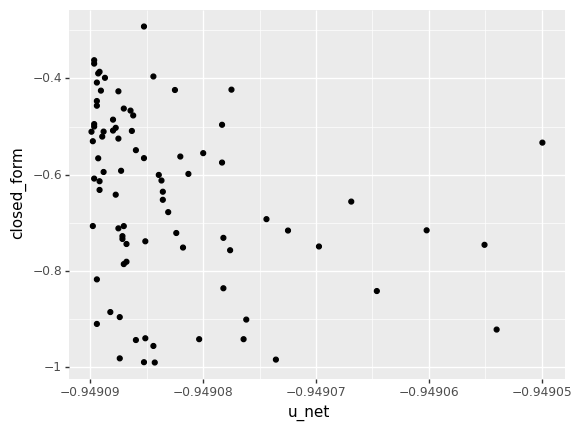

<ggplot: (8743065076913)>

time: 1.21 s (started: 2022-05-22 08:52:20 +00:00)


In [44]:
# plot the fitted value function vs the closed form (ideally straight line...)
u_internal_sample = torch.cat((internal_sample, mequation.pi_net(internal_sample).reshape(-1,1)), dim=1)
u_net_results = u_net(u_internal_sample).detach().cpu().numpy().reshape(-1).tolist()
htx_results = Htx(u_internal_sample).cpu().detach().numpy().reshape(-1).tolist()
dataf2 = pd.DataFrame( { 'u_net': u_net_results, 'closed_form': htx_results } )
ggplot(dataf2, aes(x='u_net', y='closed_form')) + geom_point()

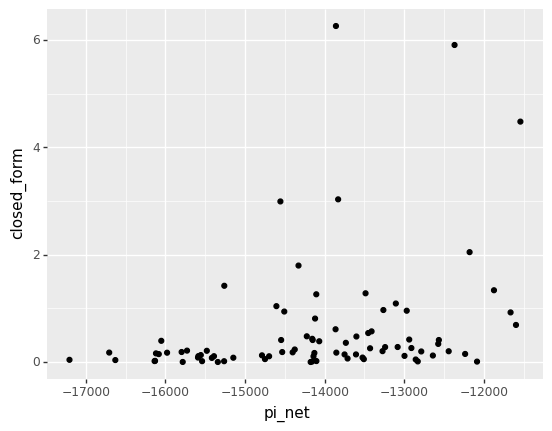

<ggplot: (8743064973353)>

time: 1.34 s (started: 2022-05-22 08:52:25 +00:00)


In [45]:
# plot the control function vs the closed form (ideally straight line...)
dataf = pd.DataFrame( { 'pi_net': mequation.pi_net(internal_sample).cpu().detach().numpy().reshape(-1).tolist(), 
                       'closed_form': (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*(1.0-time))).numpy().tolist() } )
ggplot(dataf, aes(x='pi_net', y='closed_form')) + geom_point()


### Extracting just the PiNet! And testing that

In [ ]:
gamma = 1.0
internal_sample, terminal_sample = mequation.sample(size=5, to_cpu=False)
mask = (internal_sample[:,0] > 0.1) & (internal_sample[:,4] > 0.1)
internal_sample = internal_sample[mask.reshape(-1),:]
# time, wealth, mu, r, sigma
time = internal_sample[:,0].cpu().detach()
wealth = internal_sample[:,1].cpu().detach()
mu = internal_sample[:,2].cpu().detach()
r = internal_sample[:,3].cpu().detach()
sigma = internal_sample[:,4].cpu().detach()


# closed form value function
def Htx(x):
  return -torch.exp(-x[:,1].reshape(-1,1)*1.0*torch.exp(x[:,3].reshape(-1,1)*(1.0-x[:,0].reshape(-1,1))) - 
                    0.5*(1.0-x[:,0].reshape(-1,1))*((x[:,2].reshape(-1,1)-x[:,3].reshape(-1,1))/(x[:,4].reshape(-1,1)))**2  )
  

# plot the fitted value function vs the closed form (ideally straight line...)
u_internal_sample = torch.tensor(torch.cat((internal_sample, mequation.pi_net(internal_sample).reshape(-1,1)), dim=1),requires_grad=True)
# u_net_results = u_net(u_internal_sample).detach().cpu().numpy().reshape(-1).tolist()
htx_results = Htx(u_internal_sample)
htx_results.backward()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


RuntimeError: ignored

time: 49.1 ms (started: 2022-05-19 17:36:30 +00:00)


In [ ]:
print(u_internal_sample.grad)
# htx_results.grad_fn(htx_results)

None


tensor([[0.4881],
        [0.7296],
        [0.3478],
        [0.8353]], device='cuda:0', grad_fn=<NegBackward0>)

time: 6.52 ms (started: 2022-05-19 17:37:03 +00:00)


In [ ]:
i_sample = torch.tensor(torch.cat((torch.tensor([[2.],[3.]]), torch.tensor([[4.],[4.]])), dim=1),requires_grad=True)
def test_fn(x):
  return torch.einsum("i->", x[:,1]**2 + x[:,0] )
test_res = test_fn(i_sample)
test_res.backward()
i_sample.grad


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


tensor([[1., 8.],
        [1., 8.]])

time: 7.68 ms (started: 2022-05-19 17:47:29 +00:00)


In [ ]:
i_sample

tensor([[2., 4.],
        [3., 4.]], requires_grad=True)

time: 4.39 ms (started: 2022-05-19 17:38:48 +00:00)


#### PiEquationWithFixedUtx

In [ ]:
class PiEquationWithFixedUtx():

    def __init__(self , pi_net, u_fn):
        self.pi_net = pi_net
        self.wgamma = 0.0001
        self.u_fn = u_fn

    def criterion(self, x_internal):



      #  time, wealth, mu, r, sigma
      pi_net_preds = self.pi_net(x_internal)
      # pi_net_preds = pi_net_preds[:,0].reshape(-1,1)
      pi_net_preds = pi_net_preds.reshape(-1,1)

      dpi = torch.autograd.grad( pi_net_preds, 
                                x_internal, 
                                grad_outputs=torch.ones_like(pi_net_preds) ,
                                create_graph=True,
                                retain_graph=True)
      dpi_dt = dpi[0][:,0].reshape(-1,1)
      dpi_dx = dpi[0][:,1].reshape(-1,1)

      d2pi_dx2 = torch.autograd.grad( dpi_dx, 
                                      x_internal , 
                                      grad_outputs=torch.ones_like(dpi_dx) ,
                                      create_graph = True,
                                      retain_graph=True)[0][:,1].reshape(-1,1)
      intC = None
      # pdb.set_trace()
      if len(x_internal) == 0:
        intC_loss = torch.tensor(0).cuda().float()  
      else:
        # pdb.set_trace()
        intC_loss = -(pi_net_preds*(x_internal[:,2].reshape(-1,1)-x_internal[:,3].reshape(-1,1)) + x_internal[:,3].reshape(-1,1)*x_internal[:,1].reshape(-1,1))*self.du_dx - \
                                    0.5*(x_internal[:,4].reshape(-1,1)**2)*(pi_net_preds**2)*self.d2u_dx2

        # print(f"Pi Loss {torch.mean(intC_loss).item()} {x_internal.shape[0]} {torch.mean(self.du_dx)}")          

        # intC_loss = (pi_net_preds*(x_internal[:,2].reshape(-1,1)-x_internal[:,3].reshape(-1,1)) + x_internal[:,3].reshape(-1,1)*x_internal[:,1].reshape(-1,1))*self.du_dx + \
        #                             0.5*(x_internal[:,4].reshape(-1,1)**2)*(pi_net_preds**2)*self.d2u_dx2

      return  1.0*intC_loss

    def calculatePiLoss(self, x_internal, keep_batch = False):
        '''
        Helper function that Sample and Calculate loss,
        '''        
        x_internal = Variable( x_internal , requires_grad=True)
        u_value = self.u_fn(x_internal)
        u_value.backward()
        

        Ls = self.criterion( x_internal )
        
        return_losses = []
        if not keep_batch:
          loss_pi = torch.mean(Ls)           
          return loss_pi          
        else:
          return Ls


time: 29.6 ms (started: 2022-05-19 14:38:29 +00:00)


In [ ]:
# closed form value function
def Htx(x):
  return -torch.exp(-x[:,1].reshape(-1,1)*1.0*torch.exp(x[:,3].reshape(-1,1)*(1.0-x[:,0].reshape(-1,1))) - 
                    0.5*(1.0-x[:,0].reshape(-1,1))*((x[:,2].reshape(-1,1)-x[:,3].reshape(-1,1))/(x[:,4].reshape(-1,1)))**2  )

u_net = MertonUtilityNet( NL = 6 , NN = 100 )
u_net.to(torch.device("cuda:0")) 
pi_net = MertonPiNet( NL = 6 , NN = 100 )
pi_net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions

mequation = MertonEquation(u_net, pi_net, max_pi_epochs, lr_for_pi)




        # pi_model = PiEquation(self.pi_net, du_dx, d2u_dx2)                
        # pi_trainer = TrainInternalPiWithDGM(self, pi_model, x_internal.shape[0], 
        #                                     self.pi_net_epoch, self.pi_net_lr, 
        #                                     debug=True, loss_multiply=1.0)
        # pi_trainer.use_early_stop = True
        # pi_trainer.early_stop_patience = min(200,math.ceil(self.pi_net_epoch/10.0))
        # pi_trainer.train()


#### Test Case WITH Stratification

In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

# u_net, pi_net, pi_net_epoch, pi_net_lr
eqLossFn= 'calculateLoss'
sample_method= "U"
lr = 0.01
max_pi_epochs = 400

u_net = MertonUtilityNet( NL = 3 , NN = 30 )
u_net.to(torch.device("cuda:0")) 
pi_net = MertonPiNet( NL = 3 , NN = 30 )
pi_net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
mequation = MertonEquation(u_net, pi_net, max_pi_epochs, lr)
mequation.xbreaks = np.linspace(0, mequation.MAX_X, 3).tolist()
mequation.tbreaks = np.linspace(0, mequation.T, 3).tolist()
trainMertonAlloc = TrainHJBMertonWithDGM(u_net, mequation, BATCH_SIZE = 2**8 , debug = True )
trainMertonAlloc.hook_interval = 10
trainMertonAlloc.use_early_stop = True
trainMertonAlloc.early_stop_patience = 20
# trainEuss.validation_sample = bsequation.sample(sample_method_X="U", size=2**6)
trainMertonAlloc.train_stratified( epoch = 4000 , lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method)
# trainMertonAlloc.train(epoch = 4000 , lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method)




> <ipython-input-157-7434d0b31bb1>(174)train_stratified()
-> internal_xts_bts, terminal_xts_bts = self.model.sample_stratified(sample_method_X = sample_method_X, size=self.BATCH_SIZE)
(Pdb) self.model.sample_stratified(sample_method_X = sample_method_X, size=self.BATCH_SIZE)[0].shape
*** AttributeError: 'list' object has no attribute 'shape'
(Pdb) len(self.model.sample_stratified(sample_method_X = sample_method_X, size=self.BATCH_SIZE)[0])
4
(Pdb) n
> <ipython-input-157-7434d0b31bb1>(175)train_stratified()
-> validation_stratum_losses = None #np.array([])#.reshape(1,self.validation_losses.shape[1])
(Pdb) n
> <ipython-input-157-7434d0b31bb1>(176)train_stratified()
-> training_stratum_losses = None # np.array([])#.reshape(1,self.train_losses.shape[1])
(Pdb) n
> <ipython-input-157-7434d0b31bb1>(177)train_stratified()
-> training_value_to_optimize = torch.tensor(0.0,requires_grad=True)
(Pdb) n
> <ipython-input-157-7434d0b31bb1>(180)train_stratified()
-> for stratum_count in range(len(inter

BdbQuit: ignored

time: 57.8 s (started: 2022-05-16 15:25:18 +00:00)


In [ ]:
# pie_net = MertonPiNet( NL = 3 , NN = 30 )
# pie_input = torch.tensor([[7.4874e-01, 3.0019e+00, 1.1477e-01, 2.2795e-03, 3.9906e-01]])
# pie_net(pie_input)

tensor([[0.4825, 0.5175]], grad_fn=<SoftmaxBackward0>)

time: 24.6 ms (started: 2022-05-16 08:08:23 +00:00)


In [ ]:
q